<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/BlackandSholes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install py_vollib
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

In [28]:
# Implementation of Black-Scholes formula in Python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

# Define variables
r = 0.125       # Interest tax
S = 97         # Stock
K = 100         # Stirke
T = 28/252    # Time to end
sigma = 0.60   # Volatility

def blackScholes(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price, bs(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [4]:
print("Option Price: ", blackScholes(r, S, K, T, sigma, "c"))

Option Price:  (7.007429753297004, 7.007429753297002)


In [5]:
def delta_calc(r, S, K, T, sigma, type="c"):
    "Calculate delta of an option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    try:
        if type == "c":
            delta_calc = norm.cdf(d1, 0, 1)
        elif type == "p":
            delta_calc = -norm.cdf(-d1, 0, 1)
        return delta_calc, delta(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [6]:
def gamma_calc(r, S, K, T, sigma, type="c"):
    "Calculate gamma of a option"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        gamma_calc = norm.pdf(d1, 0, 1)/(S*sigma*np.sqrt(T))
        return gamma_calc, gamma(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [7]:
def vega_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        vega_calc = S*norm.pdf(d1, 0, 1)*np.sqrt(T)
        return vega_calc*0.01, vega(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [8]:
def theta_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) - r*K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            theta_calc = -S*norm.pdf(d1, 0, 1)*sigma/(2*np.sqrt(T)) + r*K*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return theta_calc/365, theta(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [9]:
def rho_calc(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            rho_calc = K*T*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            rho_calc = -K*T*np.exp(-r*T)*norm.cdf(-d2, 0, 1)
        return rho_calc*0.01, rho(type, S, K, T, r, sigma)
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [10]:
option_type='p'

print("Option Price: ", [round(x,3) for x in blackScholes(r, S, K, T, sigma, option_type)])
print("       Delta: ", [round(x,3) for x in delta_calc(r, S, K, T, sigma, option_type)])
print("       Gamma: ", [round(x,3) for x in gamma_calc(r, S, K, T, sigma, option_type)])
print("       Vega : ", [round(x,3) for x in vega_calc(r, S, K, T, sigma, option_type)])
print("       Theta: ", [round(x,3) for x in theta_calc(r, S, K, T, sigma, option_type)])
print("       Rho  : ", [round(x,3) for x in rho_calc(r, S, K, T, sigma, option_type)])

Option Price:  [8.628, 8.628]
       Delta:  [-0.493, -0.493]
       Gamma:  [0.021, 0.021]
       Vega :  [0.129, 0.129]
       Theta:  [-0.076, -0.076]
       Rho  :  [-0.063, -0.063]


In [11]:
# Define variables
r1 = 0.125       # Interest tax
S1 = 100         # Stock
K1 = 97         # Stirke
T1 = 28/252    # Time to end
sigma1 = 0.60   # Volatility
type1="c"

In [12]:
d11 = (np.log(S1/K1) + (r1 + sigma1**2/2)*T1)/(sigma1*np.sqrt(T1))
d21 = d11 - sigma1*np.sqrt(T1)

In [13]:
d11

0.32174048186798665

In [14]:
type1="p"
A=bs(type1, S1, K1, T1, r1, sigma1)
A

5.813969249110002

In [68]:
s = np.linspace(95,105,100)
#k1 = [90.0,95.0,100.0,105.0, 110.0]
#k1 =100

In [48]:
y = blackScholes(r, S, k1, T, sigma, "c")
y

(7.007429753297004, 7.007429753297002)

In [50]:
def divisão (n1,n2):
  y = n1/n2
  return y

In [59]:
resultado = divisão(8,2)
print(resultado)
type(resultado)

4.0


float

In [69]:
def blackScholes1(r, S, K, T, sigma, type="c"):
    "Calculate BS price of call/put"
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:
        if type == "c":
            price = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        elif type == "p":
            price = K*np.exp(-r*T)*norm.cdf(-d2, 0, 1) - S*norm.cdf(-d1, 0, 1)
        return price
    except:
        print("Please confirm option type, either 'c' for Call or 'p' for Put!")

In [74]:
s = np.linspace(75,125,100)

In [75]:
y = blackScholes1(r, S, s, T, sigma,"c")

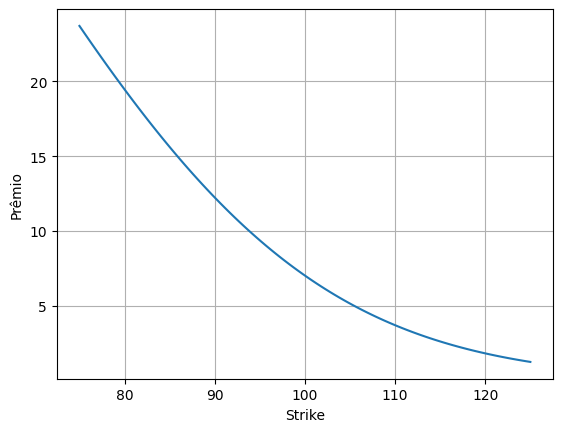

In [76]:
# Gerar o gráfico
plt.plot(s,y)
plt.grid()
plt.xlabel('Strike')
plt.ylabel('Prêmio')
plt.show()